# Linear model between Novelty and Transcience

In [42]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import pandas as pd
import os

import matplotlib.pyplot as plt

In [3]:
filename = os.path.join("..","idmdl", "tweets_emotion_date.csv")

df = pd.read_csv(filename)

df.head()

,date,emo_prob,novelty,transience,resonance,nsigma,tsigma,rsigma
0,2020-02-01,"[0.21807732877462027, 0.08096580947877421, 0.2...",0.000000,0.000368,0.000000,0.000000,0.000247,0.000000
1,2020-02-02,"[0.221372968212045, 0.07902854511969454, 0.238...",0.000000,0.000609,0.000000,0.000000,0.000100,0.000000
2,2020-02-03,"[0.20227612855287164, 0.07787824633103294, 0.2...",0.000000,0.000183,0.000000,0.000000,0.000035,0.000000
3,2020-02-04,"[0.19758550062626593, 0.07659216827524239, 0.2...",0.000509,0.000118,0.000391,0.000256,0.000046,0.000151
4,2020-02-05,"[0.20724585495965173, 0.07269186130333344, 0.2...",0.000311,0.000193,0.000119,0.000166,0.000224,0.000195


In [5]:
X = df['novelty'].tolist()
X = np.array(X).reshape(-1, 1)
X = StandardScaler().fit_transform(X)

y = df['resonance'].tolist()
y = np.array(y).reshape(-1, 1)
y = StandardScaler().fit_transform(y)

lm = LinearRegression()
lm.fit(X, y)

# beta
lm.score(X, y)

y_pred = lm.predict(X)

In [9]:
lm.score(X, y)

0.36406971639118313

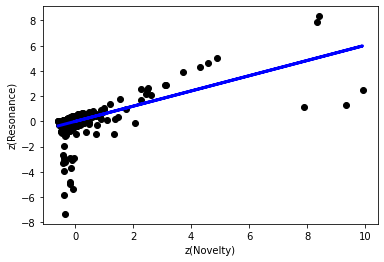

In [11]:
# plot
plt.scatter(X, y, color='black')
plt.plot(X, y_pred, color='blue', linewidth=3)
plt.xlabel('z(Novelty)')
plt.ylabel('z(Resonance)')
plt.savefig('../fig/linmdl_novelty_resonance.png')
plt.show()

# Linear model with each emotion predicting novelty/resonance signals

In [25]:
import pandas as pd
import re

In [28]:
def get_emotion_distribution(emo: str, n: int=8):
    '''
    For transforming the BERT emotion distribution from a str to a list of floats
    If there is no emotion distribution, it returns NaN
    '''
    if not isinstance(emo, str): # if emo == NaN
        return emo
    emo_list = re.split(r',\s+', emo[1:-1])[:n]
    emo_list = list(map(lambda x: float(x), emo_list))
    return emo_list

In [3]:
file_name = os.path.join("..", "idmdl", "tweets_emotion_date.csv")
df = pd.read_csv(file_name)

In [4]:
df.head()

,date,emo_prob,novelty,transience,resonance,nsigma,tsigma,rsigma
0,2020-02-01,"[0.21807732877462027, 0.08096580947877421, 0.2...",0.000000,0.000368,0.000000,0.000000,0.000247,0.000000
1,2020-02-02,"[0.221372968212045, 0.07902854511969454, 0.238...",0.000000,0.000609,0.000000,0.000000,0.000100,0.000000
2,2020-02-03,"[0.20227612855287164, 0.07787824633103294, 0.2...",0.000000,0.000183,0.000000,0.000000,0.000035,0.000000
3,2020-02-04,"[0.19758550062626593, 0.07659216827524239, 0.2...",0.000509,0.000118,0.000391,0.000256,0.000046,0.000151
4,2020-02-05,"[0.20724585495965173, 0.07269186130333344, 0.2...",0.000311,0.000193,0.000119,0.000166,0.000224,0.000195


In [5]:
labels = [
        "Glæde/Sindsro",
        "Tillid/Accept",
        "Forventning/Interrese",
        "Overasket/Målløs",
        "Vrede/Irritation",
        "Foragt/Modvilje",
        "Sorg/trist",
        "Frygt/Bekymret",
    ]

In [39]:
emo_lists = list(map(get_emotion_distribution,list(df["emo_prob"])))

In [40]:
for i, label in enumerate(labels):
    df[label] = [distribution[i] for distribution in emo_lists]

0
1
2
3
4
5
6
7


In [41]:
df.head()

,date,emo_prob,novelty,transience,resonance,nsigma,tsigma,rsigma,Glæde/Sindsro,Tillid/Accept,Forventning/Interrese,Overasket/Målløs,Vrede/Irritation,Foragt/Modvilje,Sorg/trist,Frygt/Bekymret,test
0,2020-02-01,"[0.21807732877462027, 0.08096580947877421, 0.2...",0.000000,0.000368,0.000000,0.000000,0.000247,0.000000,0.218077,0.080966,0.238088,0.190499,0.056692,0.162215,0.025408,0.027884,0
1,2020-02-02,"[0.221372968212045, 0.07902854511969454, 0.238...",0.000000,0.000609,0.000000,0.000000,0.000100,0.000000,0.221373,0.079029,0.238528,0.186883,0.057209,0.163686,0.026361,0.026764,1
2,2020-02-03,"[0.20227612855287164, 0.07787824633103294, 0.2...",0.000000,0.000183,0.000000,0.000000,0.000035,0.000000,0.202276,0.077878,0.252303,0.185128,0.054775,0.169087,0.025129,0.033257,2
3,2020-02-04,"[0.19758550062626593, 0.07659216827524239, 0.2...",0.000509,0.000118,0.000391,0.000256,0.000046,0.000151,0.197586,0.076592,0.259505,0.192543,0.053269,0.167488,0.022751,0.030103,3
4,2020-02-05,"[0.20724585495965173, 0.07269186130333344, 0.2...",0.000311,0.000193,0.000119,0.000166,0.000224,0.000195,0.207246,0.072692,0.249444,0.193463,0.052592,0.172610,0.021700,0.030093,4


In [51]:
subset = df[df["date"] > "2020-12-01"]
subset = subset[subset["date"] < "2021-01-03"]

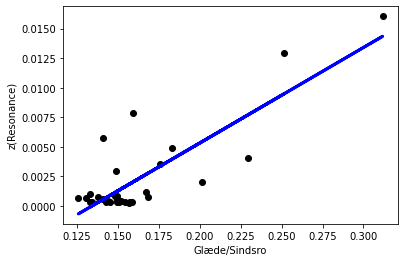

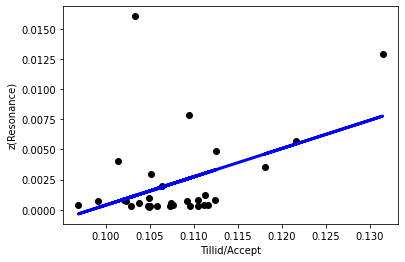

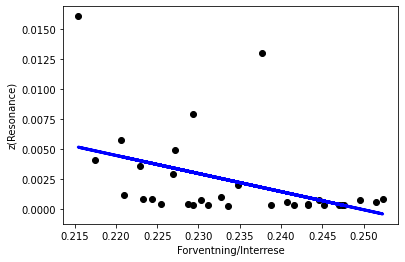

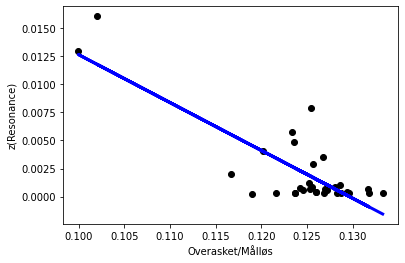

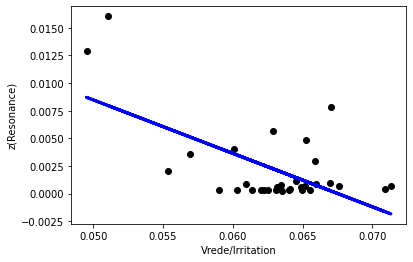

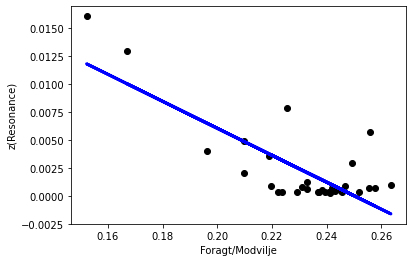

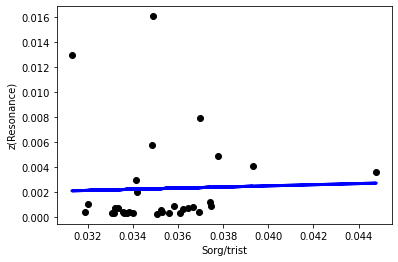

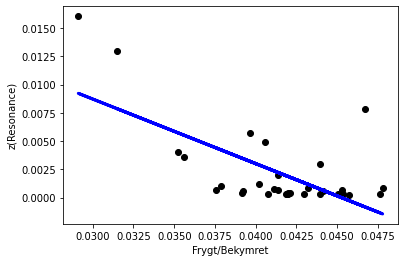

In [53]:
for label in labels:
    X = subset[label].tolist()
    X = np.array(X).reshape(-1, 1)
    # X = StandardScaler().fit_transform(X)

    y = subset['novelty'].tolist()
    y = np.array(y).reshape(-1, 1)
    # y = StandardScaler().fit_transform(y)

    lm = LinearRegression()
    lm.fit(X, y)

    # beta
    lm.score(X, y)

    y_pred = lm.predict(X)

    plt.scatter(X, y, color='black')
    plt.plot(X, y_pred, color='blue', linewidth=3)
    plt.xlabel(f'{label}')
    plt.ylabel('z(Resonance)')
    plt.show()